# MCS 275 Spring 2022 Homework 11 Solutions

* Course Instructor: Emily Dumas
* Solutions prepared by: Johnny Joyce

## Instructions:

* Complete the problems below, which ask you to write Python scripts.
* Upload your python code directly to gradescope, i.e. upload the `.py` files containing your work.  (If you upload a screenshot or other file format, you won't get credit.)

### Deadline

This homework assignment must be submitted in Gradescope by **Noon central time on Tuesday 5 April 2022**.

### Collaboration

**Collaboration is prohibited**, and you may only access resources (books, online, etc.) listed below.

### Resources you may consult

These things might be helpful while working on the problems.  Remember that for worksheets,  we don't strictly limit what resources you can consult, so these are only suggestions.

* [Worksheet 11 Solutions](https://www.dumas.io/teaching/2022/spring/mcs275/nbview/worksheets/worksheet11soln.html)
* [Lecture 27](http://dumas.io/teaching/2022/spring/mcs275/slides/lecture27.html)
* [Lecture 28](http://dumas.io/teaching/2022/spring/mcs275/slides/lecture28.html)
* [Lecture 29](http://dumas.io/teaching/2022/spring/mcs275/slides/lecture29.html)
* [VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/) -- A textbook, likely the most useful for these problems!
* [Matplotlib documentation](https://matplotlib.org/)
* The following code notebooks created in Lecture:
    * [Julia set notebook 1](https://www.dumas.io/teaching/2022/spring/mcs275/nbview/samplecode/numpy/julia.html)
    * [Julia set notebook 2 (comparing various methods)](https://www.dumas.io/teaching/2022/spring/mcs275/nbview/samplecode/numpy/julia2.html)
    * [Matplotlib intro notebook](https://www.dumas.io/teaching/2022/spring/mcs275/nbview/samplecode/matplotlib/mpl-intro.html)
* [Downey's book](https://greenteapress.com/thinkpython2/html/)

### Point distribution

This homework assignment has one problem.  The grading breakdown is:

| Points | Item |
| --- | --- |
| 2 | Autograder |
| 4 | Problem 2 |
| **6** | Total |

The part marked "autograder" reflects points assigned to your submission based on some simple automated checks for Python syntax, etc..  The result of these checks is shown immediately after you submit.

### What to do if you're stuck

Ask your instructor or TA a question by email, in office hours, or on discord.

## No problem 1 as usual

## Problem 2: Computer room cooling capacity

This problem is about the temperature in a room full of computers used for scientific calculations.  The room is cooled by an air conditioning (A/C) unit.  Imagine you suspect the A/C has insufficient capacity for the room, but only when the computers have sustained high utilization and the outside air temperature is very high (e.g. mid-summer).  In general, computers emit more heat when the CPU utilization is high.

Use matplotlib to make a visualization of the computer room air temperature and the outside air temperature on the same set of axes.  This is the sort of graph you might use to investigate your suspicions about cooling capacity.

The data you need for this is available in two files:

* [roomtemp.csv](https://www.dumas.io/teaching/2022/spring/mcs275/data/roomtemp.csv)
    - It has two columns: `timestamp` (the time in seconds since midnight on 1 January 1970 GMT) and `temp` which holds the room temperature in Fahrenheit.  This file is large, because measurements are taken every minute.

* [weather.csv](https://www.dumas.io/teaching/2022/spring/mcs275/data/weather.csv)
    - It has two columns: `timestamp` (as above) and `temp` which holds the outside air temperature.  This file is small, because the air temperature is only recorded once per hour.

Your script should be called `hwk11.py`, and should make a plot with the following characteristics:
* The data from both CSV files is shown, one line for each file
* A blue line shows the computer room temperature
* A red line shows the outside air temperature
* The x axis has no label, and remains in units of seconds since 1 Jan 1970  GMT
* The y axis is labeled "temp (F)"
* The plot is titled "Computer room and outside air temps"
* The plot has a legend which refers to the lines as "room" and "outside".

Here's a hand sketch showing the overall design of the intended plot.  It doesn't show the actual data.

![Sketch of the plot design](images/temp-plot-schematic.png)


**Then, once you've seen the actual plot, answer these questions in comments in your file:**
* Do you see any sign that the room temperature sensor might be malfunctioning?  If so, where?
* Do you think this plot can be used to draw a conclusion about the original question---whether the room has enough A/C capacity?  If not, what more information would you want?

### Hints

1. You don't need to do anything special to make two plots appear on the same axes.  If you simply call `plt.plot()` twice, that's what will happen.
2. The regularl oscillations in outside tempearture seen in the plot are days!  (The x axis units might obscure this fact, but the plot shows about two weeks of data.)

# Solution

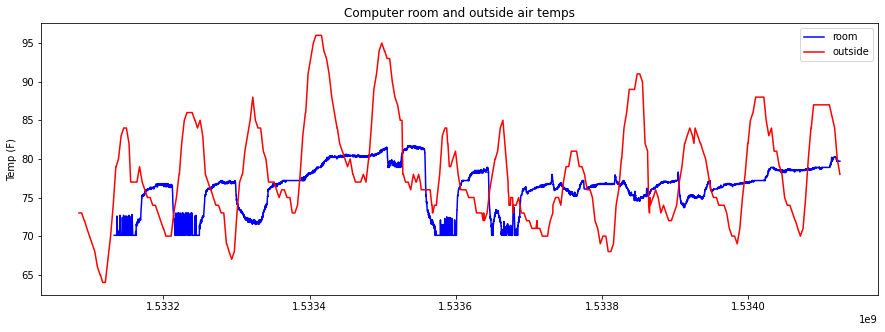

In [1]:
import csv
import matplotlib.pyplot as plt


 
# Even though both files have a "timestamp" column, there are a different number of rows in each file.
# Make two separate lists for the timestamps in each file so that the indoor temperature readings match up
# with the indoor timestamps (and vice versa for outdoors).

indoor_time = []
indoor_temp = []

outdoor_time = []
outdoor_temp = []

 # Open both files (handy context manager notation here!)
with open("roomtemp.csv", "r") as file1, open("weather.csv", "r") as file2:
    
        # Make a reader for each file
        rdr1 = csv.reader(file1)
        rdr2 = csv.reader(file2)
        
        # Skip the header row (first row) for both files
        next(rdr1)
        next(rdr2)
        
        for row in rdr1: # Convert to floats, otherwise we'll get strings (which will mess up our plot)
            indoor_time.append(float(row[0]))
            indoor_temp.append(float(row[1]))
            
        for row in rdr2:
            outdoor_time.append(float(row[0]))
            outdoor_temp.append(float(row[1]))

# Make the plot wide so it's easier to read
plt.figure(figsize = (15,5))
            
plt.plot(indoor_time, indoor_temp, c="blue", label="room")
plt.plot(outdoor_time, outdoor_temp, c="red", label="outside")

plt.ylabel("Temp (F)")
plt.title("Computer room and outside air temps")
plt.legend()

plt.show()

## Potential answers for the worded questions:

**Q: Do you see any sign that the room temperature sensor might be malfunctioning?  If so, where?**

**A:** There are some days where the room temperature dips down to around 70F and then oscillates back and forth to another temperature quickly. It is unlikely that the room temperature would change so quickly to exact temperatures, so there is likely some kind of fault.

**Q: Do you think this plot can be used to draw a conclusion about the original question---whether the room has enough A/C capacity?  If not, what more information would you want?**

**A:** In order to draw conclusions, we might want some of the following pieces of information:

* What is the indoor temperature during other seasons or over longer periods of time?
* How much were the computers being utilized over time? Were there any variations?
* What settings was the A/C unit using? Was it set to keep the room below a certain temperature, or was it set to constantly produce the same cooling output?
* Is the room used for any other purposes at any time? E.g. is it ever full of people, which generate heat?